In [8]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_circles

n = 1000


x, y = make_circles(n, noise = 0.04, random_state = 42)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

tf.random.set_seed(42)

model = tf.keras.Sequential([
                             
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

model.fit(xTrain, yTrain, epochs=100, verbose=0)


pred = model.predict(xTest)

tf.keras.metrics.mean_absolute_error(y_true = yTest, y_pred = tf.squeeze(pred))

model.evaluate(xTest, yTest)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9900


[0.03143322840332985, 0.9900000095367432]

In [10]:
loss, accuracy = model.evaluate(xTest, yTest)

print(f"loss: {loss}, Accuracy: {accuracy * 100}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9900
loss: 0.03143322840332985, Accuracy: 99.00000095367432%


In [16]:
#Y axis -> the true label
#X axis -> the predicted label

#True positive when true label is 1 and predicted is 1
#True negative when true label is 0 and predicted is 0

#False positive is when true label is 0 and predicted is 1
#False negative is when true label i 1 and predicted is 0

from sklearn.metrics import confusion_matrix
#we convert our pred into 1's or 0's for us to be able to make a confusion matrix 
#print(pred)

confusion_matrix(yTest, tf.round(pred))






array([[108,   1],
       [  1,  90]])

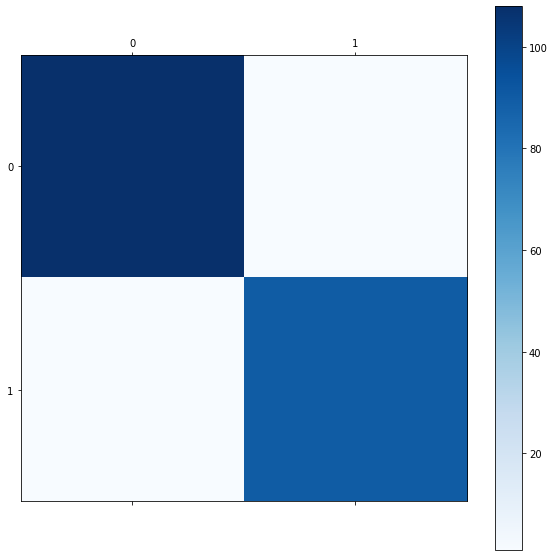

In [21]:
#Visualizing our confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt

figsize = (10, 10)


cm = confusion_matrix(yTest, tf.round(pred))

cm_norm = cm.astype("float") / cm.sum(axis=1) [:, np.newaxis]
n_classes = cm.shape[0]


fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)

fig.colorbar(cax)


if classes:
  labels = labels
else:
  labels = np.arange(cm.shape[0])

ax.st(title = "Confusion Matrix",
      xlabel ="Predicted label",
      ylabel ="True label "
      xticks = np.arange(n_classes),
      yticks = np.arange(n_classes),
      xticklabels = labels,
      yticklabels = labels
      )

threshold = (cm.max() + cm.min()) / 2.bit_length
